# CONFIGURACIONES INICIALES

Python

- Verificar que tenemos instalado python en nuestro sistema operativo

Creamos Entorno virtual

- En linux ejecutar: python3 -m venv venv
- En windows ejecutar: py -m venv venv

Activamos entorno virtual

- En linux ejecutar:source venv/bin/activate
- En windows ejecutar: .\venv\script\activate

Instalamos dependencias

- pip install numpy
- pip install ipython
- pip install ipykernel
- pip install plotly
- pip install matplotlib 
- pip install nbformat
- pip install scipy
- pip install pandas

Pasos finales

- Una vez instalado todo, desactivar el entorno virtual ingresando en la terminal "deactivate"
- Luego volver a activar el entorno virtual.
- crear el kernel para ejecutar los comandos: ipython kernel install --user --name=venv
- reiniciamos el Jupyter Notebook
- Seleccionar el kernel utilizado en el entorno virtual y no el nativo del sistema operativo, desde VSCODE en la zona superior derecha.


# Inicio

Importamos las librerias necesarias

In [1]:
import collections
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import nbformat
from scipy.stats import chi2, chisquare

Definimos las variables necesarias para ejecutar

In [2]:
############### VARIABLES FIBONACCI #################

# primer parametro es "v1" que es el valor 1, 
v1 = 23

# para provocar falso
# v1 = 1

# segundo parametro "v2" que es el valor 2,
v2 = 67

# para provocar falso
# v2 = 4

# tercer parametro es "K" y que es requerido por la funcion para "(v1 + v2) <= K"
K_Fibonacci = 177

############### VARIABLES CONGRUENCIA FUNDAMENTAL #################

# primer parametro es "a" que multiplica a Vi, 
a = 1

# segundo parametro "c" que multiplica a Vi-k, 
c = 1

# para provocar falso
# c = 4 # Falso test de Poker
# c = 3 # Falso test de Chi

# tercer parametro es "K" que es la cantidad de espacios a crear antes de los nros aleatorios
K_Congruencias = 16

# cuarto parametro es "m" que es el tope de numeros a generar
m = 10

# Minimo y Maximo (para utilizar congruencia fundamental entre un rango de valores)

minimo = 0

maximo = 12

############### VARIABLES GENERALES #################

# En Fibonacci y Congruencias el parametro "n" es la cantidad de numeros que queremos generar
n = 1000

# Definimos la confianza para aplicar en los TEST's de Poker y Ji Cuadrada
confianza = 0.6

Definimos la funcion y generamos los numeros aleatorios de Fibonacci

In [3]:
def fibonacci(v1,v2,K,n):
    if v1 < 0:
        print('Valor inválido v1, tiene que ser mayor que CERO')
    elif v2 < 0:
        print('Valor inválido de v2, tiene que ser mayor que CERO')
    elif v2 < v1:
        print('Valor inválido, v2 es menor que v1')
    elif K < 0:
        print('Valor inválido de K para Fibonacci, tiene que ser mayor que CERO')
    else:
        list = []
        list.append(v1)
        list.append(v2)
        for i in range(n):
            if (v1 + v2) <= K:
                total = v1 + v2 + (0 * K)
            else:    
                total = v1 + v2 + (-1 * K)
                
            # Reasignamos las variables
            v1 = v2
            v2 = total
            
            # Agregamos el numero nuevo
            list.append(total)

        # Retornamos el listado de numeros aleatorios concatenados 
        return(list)
    
# Generamos el listado de numeros aleatorios aplicando Fibonacci

numeros_fibonacci = fibonacci(v1,v2,K_Fibonacci,n)

# Imprimimos el array de fibonacci

print('Listado de numeros aleatorios aplicando Fibonacci:')
print(numeros_fibonacci)

Listado de numeros aleatorios aplicando Fibonacci:
[23, 67, 90, 157, 70, 50, 120, 170, 113, 106, 42, 148, 13, 161, 174, 158, 155, 136, 114, 73, 10, 83, 93, 176, 92, 91, 6, 97, 103, 23, 126, 149, 98, 70, 168, 61, 52, 113, 165, 101, 89, 13, 102, 115, 40, 155, 18, 173, 14, 10, 24, 34, 58, 92, 150, 65, 38, 103, 141, 67, 31, 98, 129, 50, 2, 52, 54, 106, 160, 89, 72, 161, 56, 40, 96, 136, 55, 14, 69, 83, 152, 58, 33, 91, 124, 38, 162, 23, 8, 31, 39, 70, 109, 2, 111, 113, 47, 160, 30, 13, 43, 56, 99, 155, 77, 55, 132, 10, 142, 152, 117, 92, 32, 124, 156, 103, 82, 8, 90, 98, 11, 109, 120, 52, 172, 47, 42, 89, 131, 43, 174, 40, 37, 77, 114, 14, 128, 142, 93, 58, 151, 32, 6, 38, 44, 82, 126, 31, 157, 11, 168, 2, 170, 172, 165, 160, 148, 131, 102, 56, 158, 37, 18, 55, 73, 128, 24, 152, 176, 151, 150, 124, 97, 44, 141, 8, 149, 157, 129, 109, 61, 170, 54, 47, 101, 148, 72, 43, 115, 158, 96, 77, 173, 73, 69, 142, 34, 176, 33, 32, 65, 97, 162, 82, 67, 149, 39, 11, 50, 61, 111, 172, 106, 101, 30, 131,

Definimos la funcion y generamos los numeros aleatorios mediante la Congruencia fundamental y utilizando la serie de Fibonacci

In [4]:
def congruencia_fundamental(a,c,K_Congruencias,m,n):
    if a <= 0:
        print('Valor inválido de A, tiene que ser mayor que CERO')
    elif c <= 0:
        print('Valor inválido de C, tiene que ser mayor que CERO')
    elif m <= 0:
        print('Valor inválido de M, tiene que ser mayor que CERO')    
    elif m < a:
        print('Valor inválido, M debe ser mayor que A')
    elif K_Congruencias < 0:
        print('Valor invalido de K para congruencias, tiene que ser mayor que CERO')
    else:
        # Creamos un Array auxiliar de K para el método con la secuencia Fibonacci
        aux = numeros_fibonacci
                       
        # Ejecutamos el metodo de congruencia fundamental
        list = []
        for i in range(n):
            nro = ((a * aux[i-1] + c * aux[i-K_Congruencias]) % m)
            list.append(nro)

        # Retornamos el listado de numeros aleatorios
        return(list)

# Generamos el listado de numeros aleatorios aplicando Congruencia Fundamental

numeros_congruencia = congruencia_fundamental(a,c,K_Congruencias,m,n)

print('Listado de numeros aleatorios aplicando Congruencia Fundamental:')
print(numeros_congruencia)

Listado de numeros aleatorios aplicando Congruencia Fundamental:
[1, 0, 8, 8, 6, 0, 2, 2, 4, 9, 6, 1, 0, 4, 7, 4, 1, 2, 6, 1, 3, 0, 3, 3, 9, 8, 3, 4, 0, 4, 7, 4, 4, 4, 4, 1, 1, 5, 6, 1, 3, 0, 9, 9, 8, 3, 1, 7, 1, 4, 8, 5, 6, 1, 7, 1, 4, 1, 5, 6, 7, 6, 6, 2, 4, 2, 6, 8, 4, 2, 9, 7, 9, 9, 1, 3, 7, 3, 3, 9, 5, 4, 2, 9, 1, 3, 0, 3, 9, 8, 7, 5, 5, 3, 1, 4, 5, 5, 3, 1, 7, 1, 8, 2, 3, 8, 4, 2, 9, 4, 3, 0, 9, 2, 4, 9, 6, 8, 7, 5, 5, 6, 1, 0, 4, 4, 4, 4, 1, 5, 9, 7, 2, 5, 7, 2, 5, 7, 2, 5, 0, 8, 4, 5, 9, 7, 6, 6, 8, 4, 5, 2, 0, 2, 5, 3, 1, 0, 7, 0, 0, 0, 3, 9, 2, 4, 6, 6, 2, 8, 6, 0, 2, 8, 6, 7, 6, 6, 5, 4, 2, 9, 4, 6, 3, 2, 8, 6, 0, 9, 9, 4, 6, 0, 2, 8, 3, 4, 0, 0, 3, 3, 9, 5, 7, 5, 5, 6, 4, 3, 0, 3, 6, 2, 4, 2, 6, 8, 7, 1, 4, 5, 2, 3, 8, 4, 5, 9, 7, 2, 5, 7, 5, 8, 6, 7, 3, 3, 2, 8, 3, 7, 3, 3, 9, 8, 7, 8, 1, 2, 6, 1, 3, 0, 3, 3, 9, 8, 3, 4, 0, 4, 7, 4, 4, 4, 4, 1, 1, 5, 6, 1, 3, 0, 9, 9, 8, 3, 1, 7, 1, 4, 8, 5, 6, 1, 7, 1, 4, 1, 5, 6, 7, 6, 6, 2, 4, 2, 6, 8, 4, 2, 9, 7, 9, 9, 1, 3, 7, 3, 3, 9

Definimos y generamos el listado de numeros aleatorios utilizando un rango de valores minimos y maximos

In [5]:
def congruencia_fundamental_rangos(a,c,K_Congruencias,m,n, minimo, maximo):
    if a <= 0:
        print('Valor inválido de A, tiene que ser mayor que CERO')
    elif c <= 0:
        print('Valor inválido de C, tiene que ser mayor que CERO')
    elif m <= 0:
        print('Valor inválido de M, tiene que ser mayor que CERO')    
    elif m < a:
        print('Valor inválido, M debe ser mayor que A')
    elif K_Congruencias < 0:
        print('Valor invalido de K para congruencias, tiene que ser mayor que CERO')
    elif maximo < minimo:
        print('Valor invalido de MAXIMO, tiene que ser mayor que MINIMO')
    else:
        # Creamos un Array auxiliar de K para el método con la secuencia Fibonacci
        aux = numeros_fibonacci
                       
        # Ejecutamos el metodo de congruencia fundamental
        list = []
        for i in range(n):
            nro = ((a * aux[i-1] + c * aux[i-K_Congruencias]) % m)
            # Transformar el número generado a un número en el rango [minimo, maximo]
            rango = maximo - minimo + 1
            numero_aleatorio = minimo + aux[i-1] % rango
            list.append(numero_aleatorio)

        # Retornamos el listado de numeros aleatorios
        return(list)
    
# Generamos el listado de numeros aleatorios aplicando Congruencia Fundamental con valores de minimo y maximo

numeros_congruencia_rangos = congruencia_fundamental_rangos(a,c,K_Congruencias,m,n,minimo,maximo)
print('Listado de numeros aleatorios aplicando Congruencia Fundamental entre rango de valores:')
print(numeros_congruencia_rangos)

Listado de numeros aleatorios aplicando Congruencia Fundamental entre rango de valores:
[1, 10, 2, 12, 1, 5, 11, 3, 1, 9, 2, 3, 5, 0, 5, 5, 2, 12, 6, 10, 8, 10, 5, 2, 7, 1, 0, 6, 6, 12, 10, 9, 6, 7, 5, 12, 9, 0, 9, 9, 10, 11, 0, 11, 11, 1, 12, 5, 4, 1, 10, 11, 8, 6, 1, 7, 0, 12, 12, 11, 2, 5, 7, 12, 11, 2, 0, 2, 2, 4, 11, 7, 5, 4, 1, 5, 6, 3, 1, 4, 5, 9, 6, 7, 0, 7, 12, 6, 10, 8, 5, 0, 5, 5, 2, 7, 9, 8, 4, 4, 0, 4, 4, 8, 12, 12, 3, 2, 10, 12, 9, 0, 1, 6, 7, 0, 12, 4, 8, 12, 7, 11, 5, 3, 0, 3, 8, 3, 11, 1, 4, 5, 1, 11, 12, 10, 1, 11, 12, 2, 6, 8, 6, 6, 12, 5, 4, 9, 5, 1, 11, 12, 2, 1, 3, 9, 4, 5, 1, 11, 4, 2, 11, 5, 3, 8, 11, 11, 9, 7, 8, 7, 7, 6, 5, 11, 8, 6, 1, 12, 5, 9, 1, 2, 8, 10, 5, 7, 4, 11, 2, 5, 12, 4, 8, 4, 12, 8, 7, 7, 6, 0, 6, 6, 4, 2, 6, 0, 11, 11, 9, 7, 3, 2, 10, 4, 1, 5, 11, 8, 11, 6, 4, 2, 11, 5, 8, 0, 8, 0, 0, 0, 5, 10, 2, 12, 1, 5, 11, 3, 1, 9, 2, 3, 5, 0, 5, 5, 2, 12, 6, 10, 8, 10, 5, 2, 7, 1, 0, 6, 6, 12, 10, 9, 6, 7, 5, 12, 9, 0, 9, 9, 10, 11, 0, 11, 11, 1, 12, 5, 4

Definimos las funciones para realizar y validar el test de Poker y Generamos los mismos

In [6]:
def test_poker(nros):
    # Test poker
    a = 0
    i = 0
    grupos = []
    tipos = [0, 0, 0, 0, 0, 0, 0]
    cant_grupos = len(nros) // 5

    # Agrupar de a 5 elementos
    while a < cant_grupos:
        grupos.append(nros[i:i + 5])
        a += 1
        i += 5

    # Clasificar grupos (obtener frecuencia observada)
    for item in grupos:
        apariciones = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        valor = 1

        for i in range(10):
            apariciones[i] += str(item).count(str(i))

        for i in range(10):
            if apariciones[i] > 0:
                valor = valor * apariciones[i]

        if valor == 1:
            tipos[0] += 1
        elif valor == 2:
            tipos[1] += 1
        elif valor == 3:
            tipos[3] += 1
        elif valor == 4:
            if 4 in apariciones:
                tipos[5] += 1
            else:
                tipos[2] += 1
        elif valor == 5:
            tipos[6] += 1
        elif valor == 6:
            tipos[4] += 1
        else:
            return "error"

    # Calculo de fe
    fe = [0, 0, 0, 0, 0, 0, 0]
    fe[0] = cant_grupos * 0.3024
    fe[1] = cant_grupos * 0.504
    fe[2] = cant_grupos * 0.108
    fe[3] = cant_grupos * 0.072
    fe[4] = cant_grupos * 0.009
    fe[5] = cant_grupos * 0.0045
    fe[6] = cant_grupos * 0.0001

    # Calculo de x0
    x0 = 0
    for i in range(7):
        x0 += ((fe[i] - tipos[i]) ** 2) / fe[i]

    return x0

def res_test_poker(resultado, confianza): 

    grados_libertad = len(numeros_congruencia)-1

    valor_chi2 = chi2.ppf(confianza, grados_libertad)
        
    if valor_chi2 > resultado:
        print(f"{resultado} < {valor_chi2}")
        print("El resultado del test de Poker para Fibonacci + Congruencia Fundamental es VERDADERO")
    else:
        print(f"{resultado} > {valor_chi2}")
        print("El resultado del test de Poker para Fibonacci + Congruencia Fundamental es FALSO")
        
# Se genera la impresion de los resultados en la funcion

resultado = test_poker(numeros_congruencia)

# Se genera la impresion de los resultados en la funcion

resultadoTest = res_test_poker(resultado, confianza)

30.26455026455027 < 1009.6961921031988
El resultado del test de Poker para Fibonacci + Congruencia Fundamental es VERDADERO


Definimos las funciones para realizar y validar el test de Ji Cuadrado y generamos los mismos

In [7]:
def test_jicuadrado(nros):

    x0 = 0
    fi = [0]*10

    # Cálculo de fi
    for item in nros:
        fi[item] += 1

    # Cálculo de npi
    npi = len(nros)/10

    # Cálculo de x0
    for i in range(len(fi)):
        x0 += ((fi[i] - npi)*(fi[i] - npi)) / npi

    return x0

def res_test_chi(numeros, resultado, confianza): 

    grados_libertad = len(numeros)-1

    valor_chi2 = chi2.ppf(1 - confianza, grados_libertad)
            
    #Comparamos si el resultado es menor o mayor al correspondiente en la tabla
    if (valor_chi2 > resultado ):
        print(f"{resultado} < {valor_chi2}")
        print('El resultado del test de Ji Cuadrado para Fibonacci + Congruencia Fundamental es VERDADERO')
        return
    else:
        print(f"{resultado} > {valor_chi2}")
        print('El resultado del test de Ji Cuadrado para Fibonacci + Congruencia Fundamental es FALSO')
        return
    
# Se genera la impresion de los resultados en la funcion

resultado = test_jicuadrado(numeros_congruencia)

# Se genera la impresion de los resultados en la funcion

resultadoTest = res_test_chi(numeros_congruencia, resultado, confianza)

25.92 < 987.0562079660383
El resultado del test de Ji Cuadrado para Fibonacci + Congruencia Fundamental es VERDADERO


Definimos y realizamos los Test's sobre los numeros aleatorios aplicando el rango de valores mínimo y maximo y generamos los mismos

In [8]:
def test_poker_rangos(nros, minimo, maximo):
    # Test poker
    a = 0
    i = 0
    grupos = []
    tipos = [0, 0, 0, 0, 0, 0, 0]
    cant_grupos = len(nros) // 5

    # Agrupar de a 5 elementos
    while a < cant_grupos:
        grupo = []
        for j in range(5):
            grupo.append((nros[i] - minimo) / (maximo - minimo))
            i += 1
        grupos.append(grupo)
        a += 1

    # Clasificar grupos (obtener frecuencia observada)
    for item in grupos:
        apariciones = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        valor = 1

        for i in range(10):
            apariciones[i] += item.count(i)

        for i in range(10):
            if apariciones[i] > 0:
                valor = valor * apariciones[i]

        if valor == 1:
            tipos[0] += 1
        elif valor == 2:
            tipos[1] += 1
        elif valor == 3:
            tipos[3] += 1
        elif valor == 4:
            if 4 in apariciones:
                tipos[5] += 1
            else:
                tipos[2] += 1
        elif valor == 5:
            tipos[6] += 1
        elif valor == 6:
            tipos[4] += 1
        else:
            return "error"

    # Calculo de fe
    fe = [0, 0, 0, 0, 0, 0, 0]
    fe[0] = cant_grupos * 0.3024
    fe[1] = cant_grupos * 0.504
    fe[2] = cant_grupos * 0.108
    fe[3] = cant_grupos * 0.072
    fe[4] = cant_grupos * 0.009
    fe[5] = cant_grupos * 0.0045
    fe[6] = cant_grupos * 0.0001

    # Calculo de x0
    x0 = 0
    for i in range(7):
        x0 += ((fe[i] - tipos[i]) ** 2) / fe[i]

    return x0

def res_test_poker_rangos(resultado, confianza):
    

    grados_libertad = len(numeros_congruencia_rangos)

    valor_chi2 = chi2.ppf(confianza, grados_libertad)
        
    if valor_chi2 > resultado:
        print(f"{resultado} < {valor_chi2}")
        print("El resultado del test de Poker para Fibonacci + Congruencia Fundamental es VERDADERO")
    else:
        print(f"{resultado} > {valor_chi2}")
        print("El resultado del test de Poker para Fibonacci + Congruencia Fundamental es FALSO")
        
# Se genera la impresion de los resultados en la funcion

resultado = test_poker_rangos(numeros_congruencia_rangos, minimo, maximo)

# Se genera la impresion de los resultados en la funcion

resultadoTest = res_test_poker_rangos(resultado, confianza)

356.2896825396825 < 1010.7018606419132
El resultado del test de Poker para Fibonacci + Congruencia Fundamental es VERDADERO


Aplicamos la funcion para validar si aprobo o no el test de Ji Cuadrado aplicando el rango de valores mínimo y maximo y generamos los mismos

In [9]:
def test_jicuadrado_rangos(numeros):
    x0 = 0
    fi = [0] * (max(numeros) - min(numeros) + 1)

    # Cálculo de fi
    for item in numeros:
        fi[item - min(numeros)] += 1

    # Cálculo de npi
    npi = len(numeros) / len(fi)

    # Cálculo de x0
    for i in range(len(fi)):
        x0 += ((fi[i] - npi) ** 2) / npi

    return x0

def res_test_chi_rangos(numeros, resultado, confianza): 

    grados_libertad = len(numeros)-1

    valor_chi2 = chi2.ppf(1 - confianza, grados_libertad)
                
    #Comparamos si el resultado es menor o mayor al correspondiente en la tabla
    if (valor_chi2 > resultado ):
        print(f"{resultado} < {valor_chi2}")
        print('El resultado del test de Ji Cuadrado para Fibonacci + Congruencia Fundamental es VERDADERO')
        return
    else:
        print(f"{resultado} > {valor_chi2}")
        print('El resultado del test de Ji Cuadrado para Fibonacci + Congruencia Fundamental es FALSO')
        return
    
# Se genera la impresion de los resultados en la funcion

resultado = test_jicuadrado_rangos(numeros_congruencia_rangos)

# Se genera la impresion de los resultados en la funcion

resultadoTest = res_test_chi_rangos(numeros_congruencia_rangos, resultado, confianza)

64.024 < 987.0562079660383
El resultado del test de Ji Cuadrado para Fibonacci + Congruencia Fundamental es VERDADERO


Definimos una funcion para convertir los numeros aleatorios en CERO y UNO para poder aplicar la Distribucion de Bernoulli y generamos los mismos

In [10]:
def distribucion_bernoulli(numeros):
    valores = np.array(numeros)
    binarios = np.where(valores >= 5, 1, 0)
    return binarios

# Generamos la distribucion de Bernoulli sobre los numeros aleatorios

distribucion = distribucion_bernoulli(numeros_congruencia)

print(distribucion)

[0 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0
 1 1 0 0 0 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1
 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1
 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1 0 0 1 0 1 0
 0 1 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1
 0 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 1 0
 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 0
 0 0 1 1 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 0 0 1
 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 1 1
 0 1 0 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 1
 1 1 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0
 1 0 0 0 1 1 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1 0 0 1 1 1 1 0
 0 1 0 0 0 0 0 1 1 0 0 0 

Generamos la distribucion de Bernoulli sobre los numeros aleatorios del rango de valores

In [11]:
def distribucion_bernoulli_rangos(numeros):
    mitad = (maximo + minimo) / 2
    valores = np.array(numeros)
    binarios = np.where(valores >= mitad, 1, 0)
    return binarios

distribucion_rangos = distribucion_bernoulli_rangos(numeros_congruencia_rangos)

print(distribucion_rangos)

[0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1
 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0
 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 0 1 1 1
 0 0 1 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1
 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1
 1 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1
 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0
 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 1 1 0 0 1 1
 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0
 0 0 1 1 1 0 0 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 1
 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 0
 1 1 1 0 1 0 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 0 0 1 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0
 1 1 1 1 1 0 0 1 0 0 1 1 

Contabilizamos y graficamos la distribución de Bernoulli

In [12]:
# Usamos plotly para hacer un diagrama de barras interactivo con la distribución de los datos

# Contamos los valores CERO y UNO
datos = {}

for valor in distribucion:
    if valor in datos:
        datos[valor] += 1
    else:
        datos[valor] = 1
print(datos.keys())
print(datos.values())
print(datos)

fig = go.Figure(data=[go.Pie(labels=list(datos.keys()), values=list(datos.values()))])
fig.show()

dict_keys([0, 1])
dict_values([523, 477])
{0: 523, 1: 477}


Contabilizamos y graficamos la distribución de Bernoulli segun los rangos

In [13]:
# Usamos plotly para hacer un diagrama de barras interactivo con la distribución de los datos

# Contamos los valores CERO y UNO
datos = {}

for valor in distribucion_rangos:
    if valor in datos:
        datos[valor] += 1
    else:
        datos[valor] = 1
print(datos.keys())
print(datos.values())
print(datos)

fig = go.Figure(data=[go.Pie(labels=list(datos.keys()), values=list(datos.values()))])
fig.show()

dict_keys([0, 1])
dict_values([473, 527])
{0: 473, 1: 527}


Generamos los datos y graficamos la distribución normal

la media es: 4.482
la desviación estandar es: 2.703271351529476


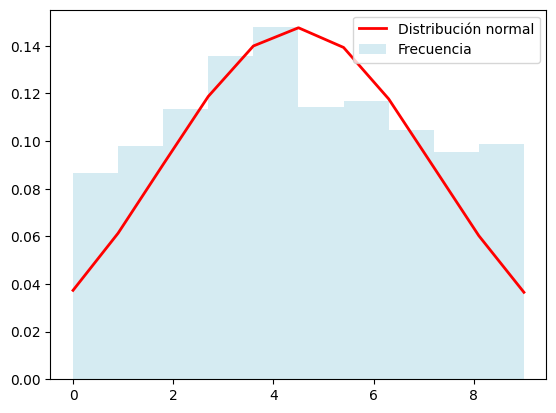

In [14]:
# Utilizamos los numeros aleatorios obtenidos por la congruencia fundamental
datos = np.array(numeros_congruencia)

# Calculamos la media y la desviación estándar
mu = np.mean(datos)
print(f"la media es: {mu}")
sigma = np.std(datos)
print(f"la desviación estandar es: {sigma}")

# Creamos un rango de valores x para la distribución normal
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

# Calculamos la distribución normal para los valores x
y = (1/(sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu)/sigma)**2)

# Creamos un histograma de los datos
n, bins, patches = plt.hist(datos, bins=10, density=True, color='lightblue', alpha=0.5)

# Creamos la curva de distribución normal
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
         np.exp(- (bins - mu)**2 / (2 * sigma**2)),
         linewidth=2, color='red')

# Configurar la leyenda
plt.legend(['Distribución normal', 'Frecuencia'])

# Mostrar el gráfico
plt.show()

Generamos los datos y graficamos la distribución normal segun los rangos establecidos

la media es: 6.075
la desviación estandar es: 3.8001809167459384


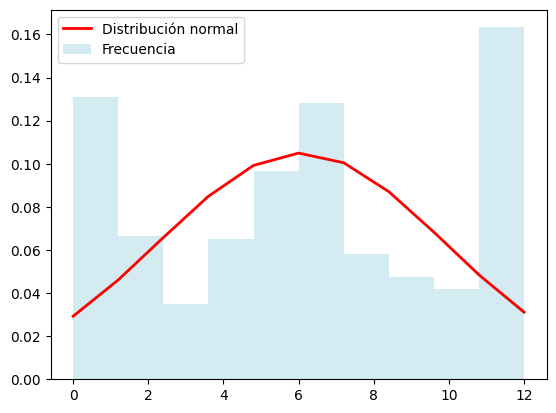

In [15]:
# Utilizamos los numeros aleatorios obtenidos por la congruencia fundamental
datos = np.array(numeros_congruencia_rangos)

# Calculamos la media y la desviación estándar
mu = np.mean(datos)
print(f"la media es: {mu}")
sigma = np.std(datos)
print(f"la desviación estandar es: {sigma}")

# Creamos un rango de valores x para la distribución normal
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

# Calculamos la distribución normal para los valores x
y = (1/(sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu)/sigma)**2)

# Creamos un histograma de los datos
n, bins, patches = plt.hist(datos, bins=10, density=True, color='lightblue', alpha=0.5)

# Creamos la curva de distribución normal
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
         np.exp(- (bins - mu)**2 / (2 * sigma**2)),
         linewidth=2, color='red')

# Configurar la leyenda
plt.legend(['Distribución normal', 'Frecuencia'])

# Mostrar el gráfico
plt.show()

Definimos y generamos las marcas de clases para generar las variables aleatorias

                 piloto  Frecuencia Esperada
0         Diego Aventín             3.333333
1        Mariano Werner            20.000000
2    Luis José Di Palma             6.666667
3          Matías Rossi            10.000000
4     Christian Ledesma             3.333333
5       Facundo Ardusso            13.333333
6         Omar Martínez             3.333333
7     Guillermo Ortelli             3.333333
8      Agustín Canapino            16.666667
9    Jonatan Castellano             3.333333
10   José Manuel Urcera            10.000000
11  Juan Cruz Benvenuti             3.333333
12    Mauricio Lambiris             3.333333


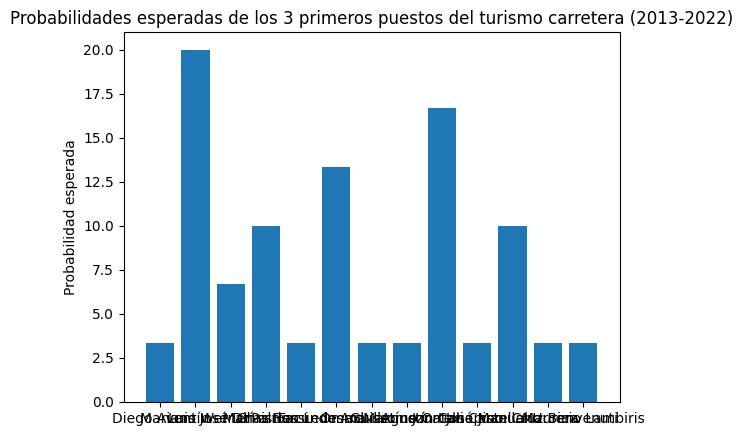

In [16]:
# Listamos los pilotos en podio del turismo carretera desde el 2013 al 2022
pilotos = ["Diego Aventín", "Mariano Werner", "Luis José Di Palma", #2013
           "Matías Rossi", "Christian Ledesma", "Facundo Ardusso", #2014
           "Omar Martínez", "Matías Rossi", "Facundo Ardusso", #2015
           "Guillermo Ortelli", "Matías Rossi", "Mariano Werner", #2016
           "Agustín Canapino", "Facundo Ardusso", "Luis José Di Palma", #2017
           "Agustín Canapino", "Jonatan Castellano", "Facundo Ardusso", #2018
           "Agustín Canapino", "José Manuel Urcera", "Mariano Werner", #2019
           "Mariano Werner", "Juan Cruz Benvenuti", "José Manuel Urcera", #2020
           "Mariano Werner", "Mauricio Lambiris", "Agustín Canapino", #2021
           "José Manuel Urcera", "Mariano Werner", "Agustín Canapino"] #2022


# Contamos la cantidad de veces que cada piloto ha obtenido un lugar entre los tres primeros puestos
pilotos_final = {}
conteo = {}
for piloto in pilotos:
    if piloto in conteo:
        conteo[piloto] += 1
    else:
        conteo[piloto] = 1

for piloto in pilotos:
    if piloto in conteo:
        #print(piloto, conteo[piloto])
        pilotos_final[piloto] =  conteo[piloto]
        del conteo[piloto]

# Número total de carreras consideradas
num_carreras = 30  # 10 años x 3 posiciones

# Calculamos la probabilidad esperada para cada piloto
prob_pilotos = {}
for piloto, count in pilotos_final.items():
    prob_pilotos[piloto] = (count / num_carreras)*100
        
# Creamos la tabla
tabla = pd.DataFrame({
    "piloto": prob_pilotos.keys(),
    "Frecuencia Esperada": prob_pilotos.values(),
})

# Mostramos la tabla
print(tabla)
    
# Representamos las probabilidades esperadas con un gráfico de barras
plt.bar(prob_pilotos.keys(), prob_pilotos.values())
#plt.xlabel("Pilotos")
plt.ylabel("Probabilidad esperada")
plt.title("Probabilidades esperadas de los 3 primeros puestos del turismo carretera (2013-2022)")
plt.show()

Generamos las marcas de clases para realizar la simulación

In [17]:
# Definimos el número de clases y la amplitud

num_clases = len(pilotos_final) # Cantidad de pilotos del listado anterior
amplitud_clase = maximo/len(pilotos_final)

# Calculamos las marcas de clase
marcas_clase = [amplitud_clase/2 + i*amplitud_clase for i in range(num_clases)]

# Calcular la frecuencia de cada clase
frecuencia_clase = [0]*num_clases
for num in numeros_congruencia_rangos:
    for i in range(num_clases):
        if num >= i*amplitud_clase and num < (i+1)*amplitud_clase:
            frecuencia_clase[i] += 1

# Imprimir los resultados
for i in range(num_clases):
    print(f"Clase {i+1}: {marcas_clase[i]} - {marcas_clase[i]+amplitud_clase}  Frecuencia observada: {frecuencia_clase[i]}")

Clase 1: 0.46153846153846156 - 1.3846153846153846  Frecuencia observada: 78
Clase 2: 1.3846153846153846 - 2.3076923076923075  Frecuencia observada: 79
Clase 3: 2.307692307692308 - 3.230769230769231  Frecuencia observada: 80
Clase 4: 3.230769230769231 - 4.153846153846154  Frecuencia observada: 42
Clase 5: 4.153846153846154 - 5.0769230769230775  Frecuencia observada: 78
Clase 6: 5.0769230769230775 - 6.000000000000001  Frecuencia observada: 116
Clase 7: 6.0 - 6.923076923076923  Frecuencia observada: 81
Clase 8: 6.923076923076923 - 7.846153846153847  Frecuencia observada: 73
Clase 9: 7.846153846153847 - 8.76923076923077  Frecuencia observada: 70
Clase 10: 8.76923076923077 - 9.692307692307693  Frecuencia observada: 57
Clase 11: 9.692307692307693 - 10.615384615384617  Frecuencia observada: 50
Clase 12: 10.615384615384617 - 11.53846153846154  Frecuencia observada: 104
Clase 13: 11.538461538461538 - 12.461538461538462  Frecuencia observada: 0


Marcas de clase: [0.46153846153846156, 1.3846153846153846, 2.307692307692308, 3.230769230769231, 4.153846153846154, 5.0769230769230775, 6.0, 6.923076923076923, 7.846153846153847, 8.76923076923077, 9.692307692307693, 10.615384615384617, 11.538461538461538]
Probabilidades: [0.07692307692307693, 0.07692307692307693, 0.07692307692307693, 0.07692307692307693, 0.07692307692307693, 0.07692307692307693, 0.07692307692307693, 0.07692307692307693, 0.07692307692307693, 0.07692307692307693, 0.07692307692307693, 0.07692307692307693, 0.07692307692307693]
Frecuencias observadas: [ 78  79  80  42  78 116  81  73  70  57  50 104  92]
Frecuencias esperadas: [30, 200, 70, 100, 30, 130, 30, 30, 170, 30, 100, 30, 50]


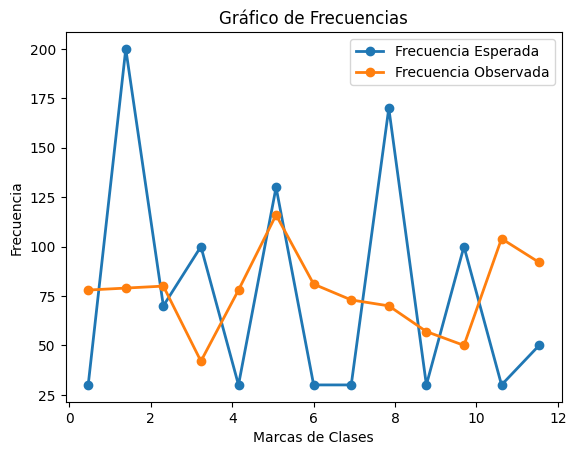

In [18]:
# Dividimos el rango de valores en N intervalos de igual tamaño
num_intervalos = len(pilotos_final) # Cantidad de pilotos del listado anterior
rango = max(numeros_congruencia_rangos) - min(numeros_congruencia_rangos)
ancho_intervalo = rango / num_intervalos

# Calculamos las marcas de clase y las probabilidades de cada intervalo
marcas_clase = [min(numeros_congruencia_rangos) + (i + 0.5) * ancho_intervalo for i in range(num_intervalos)]
probabilidades = [ancho_intervalo / rango] * num_intervalos

# Contamos cuántos números aleatorios caen en cada intervalo
frecuencias_obs = np.histogram(numeros_congruencia_rangos, bins=num_intervalos, range=(min(numeros_congruencia_rangos), max(numeros_congruencia_rangos)))[0]

# Calculamos las frecuencias esperadas
frecuencias_esp = []

cantidad_total = len(numeros_congruencia_rangos)
lista_numeros = []

porcentajes_enteros = [round(p) for p in prob_pilotos.values()]
porcentajes_enteros[-1] += 100 - sum(porcentajes_enteros)

for porcentaje in porcentajes_enteros:
    numero = int(porcentaje / 100 * cantidad_total)
    frecuencias_esp.append(numero)

# Calcular el estadístico de chi-cuadrado y el p-valor
chi2, p = chisquare(frecuencias_obs, frecuencias_esp)

print("Marcas de clase:", marcas_clase)
print("Probabilidades:", probabilidades)
print("Frecuencias observadas:", frecuencias_obs)
print("Frecuencias esperadas:", frecuencias_esp)

# Creamos el gráfico
plt.plot(marcas_clase, frecuencias_esp, '-o', label='Frecuencia Esperada', linewidth=2)
plt.plot(marcas_clase, frecuencias_obs, '-o', label='Frecuencia Observada', linewidth=2)
plt.legend(loc='best')
plt.title('Gráfico de Frecuencias')
plt.xlabel('Marcas de Clases')
plt.ylabel('Frecuencia')

# Mostramos el gráfico
plt.show()